In [1]:
!git clone https://github.com/LeonardoFM73/Project_UAS_VIskom.git

Cloning into 'Project_UAS_VIskom'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 35 (delta 10), reused 30 (delta 5), pack-reused 0
Unpacking objects: 100% (35/35), done.


In [2]:
#Untuk mengolah gambar
import cv2
import glob
import os
import warnings
import pandas as pd
#Untuk menampilkan gambar
from matplotlib import pyplot as plt 
import numpy as np


In [3]:
#Deteksi blur tanpa denoising
warnings.filterwarnings("ignore")
images=[]
value=[]
filename_Original=[]
filename=[]
Original=[]
edited_image=[]
edited_image2=[]



def variance_of_laplacian(image):
	# compute the Laplacian of the image and then return the focus
	# measure, which is simply the variance of the Laplacian
	return cv2.Laplacian(image, cv2.CV_64F),cv2.Laplacian(image, cv2.CV_64F,ksize=7),cv2.Laplacian(image, cv2.CV_64F).var()


def preprocessing():
    global images
    global Original
    global filename_Original
    global filename
    global edited_image
    filename_Original=[os.path.basename(x) for x in glob.glob('/content/Project_UAS_VIskom/BreastCancer/*.jpg')]
    filename=[os.path.basename(x) for x in glob.glob('/content/Project_UAS_VIskom/BreastCancer/*.jpg')]
    Original=[cv2.imread(file) for file in glob.glob("/content/Project_UAS_VIskom/BreastCancer/*.jpg")]
    images=[cv2.imread(file) for file in glob.glob("/content/Project_UAS_VIskom/BreastCancer/*.jpg")]

    for i in range(len(images)):
        global result
        gray = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)
        temp,temp2,fm = variance_of_laplacian(gray)
        edited_image.append(temp)
        edited_image2.append(temp2)

        if fm >100:
            text="jelas"

        cv2.putText(images[i], "{:.2f}".format(fm), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3)
        value.append(fm)

def sorting():
    for k in range(len(value)):
        for i in range(len(value)-1):
            if value[i]<value[i+1]:
                temp=images[i]
                images[i]=images[i+1]
                images[i+1]=temp
                temp1=value[i]
                value[i]=value[i+1]
                value[i+1]=temp1
                temp2=filename[i]
                filename[i]=filename[i+1]
                filename[i+1]=temp2
                temp3=edited_image[i]
                edited_image[i]=edited_image[i+1]
                edited_image[i+1]=temp3
def output():
    if os.path.isdir('/content/Project_UAS_VIskom/Output') is False:
        os.mkdir('/content/Project_UAS_VIskom/Output')
    for index in range(len(images)):
        nama = f'img_{index+1}_{filename[index]}.jpg'
        img_des = os.path.join('/content/Project_UAS_VIskom/Output', nama);
        cv2.imwrite(img_des ,images[index]);

def table():
    df=pd.DataFrame({'Nama':filename,'Besar Laplacian':value})
    print(df)

preprocessing()
sorting()
output()
table()

           Nama  Besar Laplacian
0  Cells_15.jpg        93.686708
1   Cells_3.jpg        44.523265
2   Cells_1.jpg        42.068456
3   Cells_7.jpg         9.771164
4  Cells_10.jpg         6.359963
5   Cells_5.jpg         4.078286


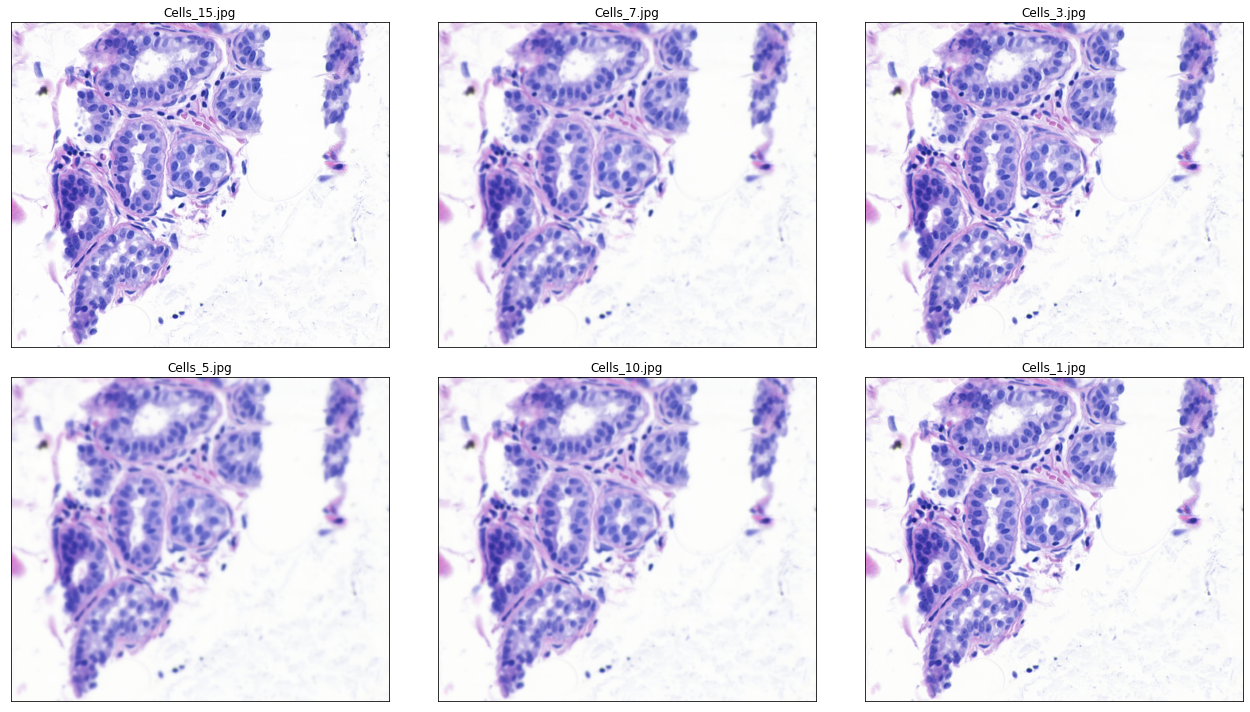

In [4]:
titles = filename_Original
plt.figure(figsize=(18,10))
for i in range(6):
    Original[i] = cv2.cvtColor(Original[i], cv2.COLOR_BGR2RGB)
    plt.subplot(2,3,i+1)
    plt.imshow(Original[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

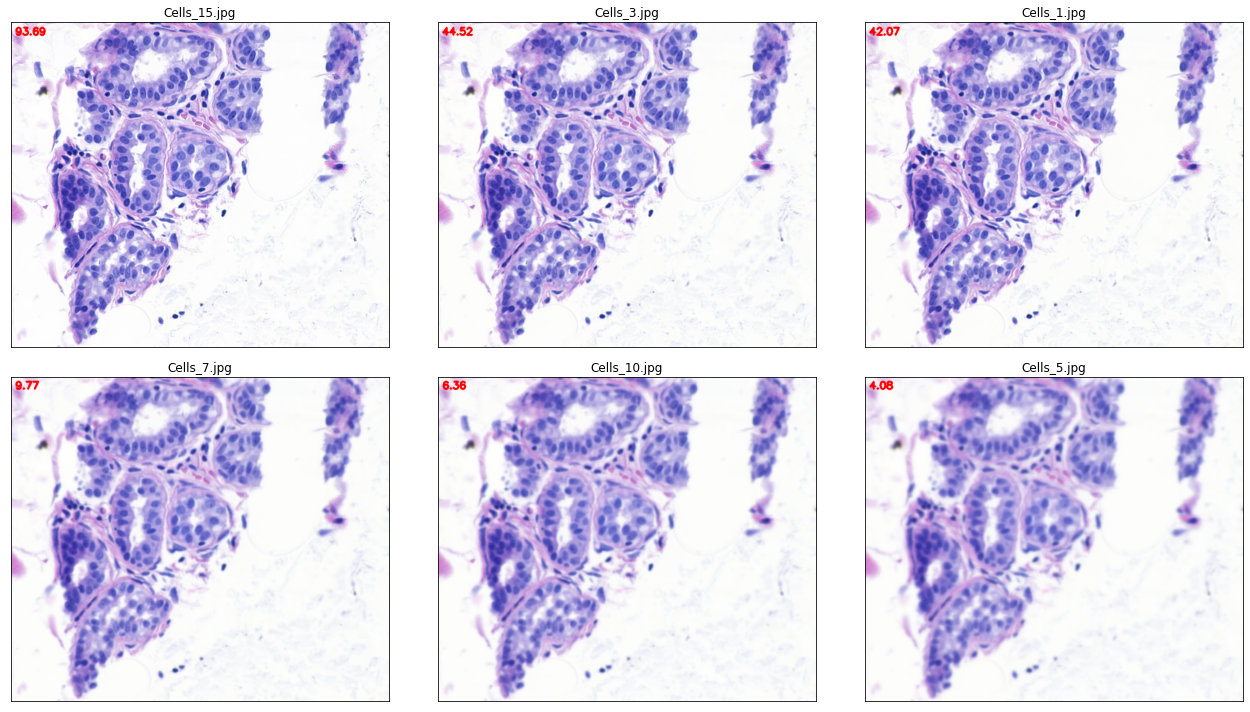

In [5]:
titles = filename
plt.figure(figsize=(18,10))
for i in range(6):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(2,3,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

In [6]:
#Deteksi blur dengan denoising cv2.fastN1MeansDenoisingColored()
warnings.filterwarnings("ignore")
images=[]
value=[]
filename_Original=[]
filename=[]
Original=[]
edited_image=[]
edited_image2=[]



def variance_of_laplacian(image):
	# compute the Laplacian of the image and then return the focus
	# measure, which is simply the variance of the Laplacian
	return cv2.Laplacian(image, cv2.CV_64F),cv2.Laplacian(image, cv2.CV_64F,ksize=7),cv2.Laplacian(image, cv2.CV_64F).var()

def denoise():
  for i in range(len(images)):
    Original[i]=cv2.fastNlMeansDenoisingColored(Original[i],None,10,10,7,21) 
    images[i]=cv2.fastNlMeansDenoisingColored(images[i],None,10,10,7,21) 

def preprocessing():
    global images
    global Original
    global filename_Original
    global filename
    global edited_image
    filename_Original=[os.path.basename(x) for x in glob.glob('/content/Project_UAS_VIskom/BreastCancer/*.jpg')]
    filename=[os.path.basename(x) for x in glob.glob('/content/Project_UAS_VIskom/BreastCancer/*.jpg')]
    Original=[cv2.imread(file) for file in glob.glob("/content/Project_UAS_VIskom/BreastCancer/*.jpg")]
    images=[cv2.imread(file) for file in glob.glob("/content/Project_UAS_VIskom/BreastCancer/*.jpg")]

    denoise()

    for i in range(len(images)):
        global result
        gray = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)
        temp,temp2,fm = variance_of_laplacian(gray)
        edited_image.append(temp)
        edited_image2.append(temp2)

        if fm >100:
            text="jelas"

        cv2.putText(images[i], "{:.2f}".format(fm), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3)
        value.append(fm)

def sorting():
    for k in range(len(value)):
        for i in range(len(value)-1):
            if value[i]<value[i+1]:
                temp=images[i]
                images[i]=images[i+1]
                images[i+1]=temp
                temp1=value[i]
                value[i]=value[i+1]
                value[i+1]=temp1
                temp2=filename[i]
                filename[i]=filename[i+1]
                filename[i+1]=temp2
                temp3=edited_image[i]
                edited_image[i]=edited_image[i+1]
                edited_image[i+1]=temp3
def output():
    if os.path.isdir('/content/Project_UAS_VIskom/Output2') is False:
        os.mkdir('/content/Project_UAS_VIskom/Output2')
    for index in range(len(images)):
        nama = f'img_{index+1}_{filename[index]}.jpg'
        img_des = os.path.join('/content/Project_UAS_VIskom/Output2', nama);
        cv2.imwrite(img_des ,images[index]);

def table():
    df=pd.DataFrame({'Nama':filename,'Besar Laplacian':value})
    print(df)

preprocessing()
sorting()
output()
table()

           Nama  Besar Laplacian
0  Cells_15.jpg        33.529059
1   Cells_1.jpg        20.390624
2   Cells_3.jpg        20.343451
3   Cells_7.jpg         8.898064
4  Cells_10.jpg         7.712305
5   Cells_5.jpg         6.460664


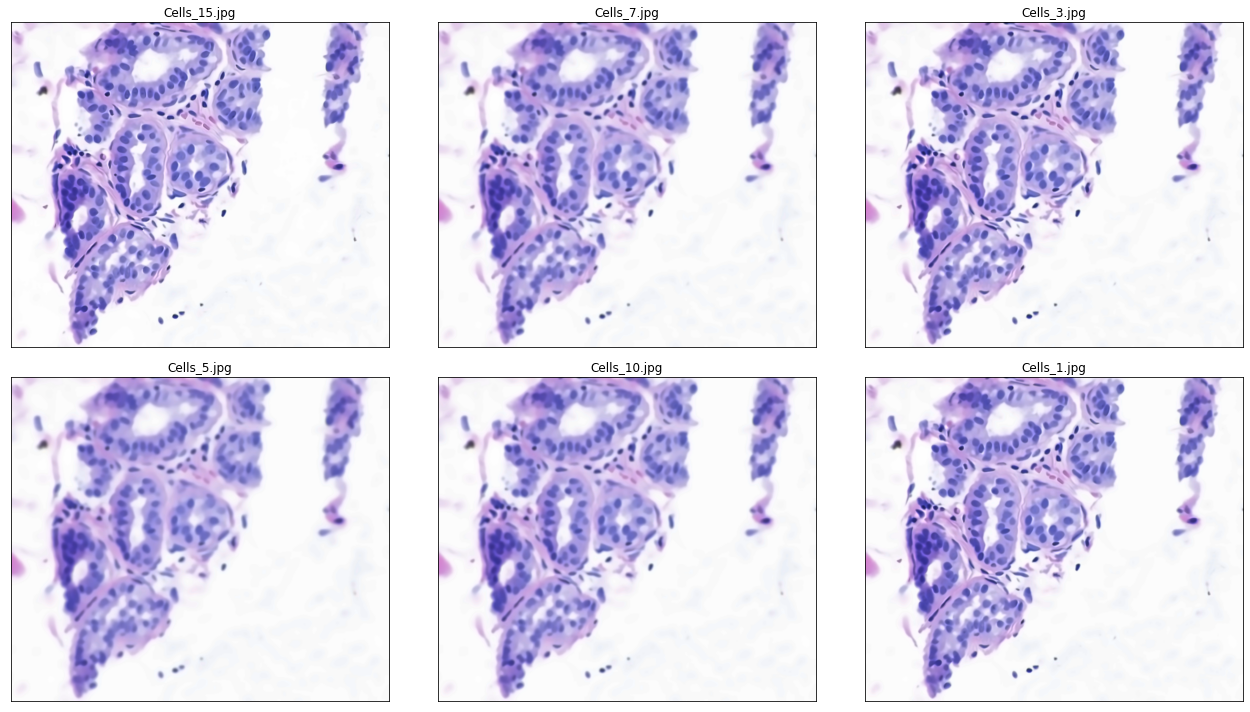

In [7]:
titles = filename_Original
plt.figure(figsize=(18,10))
for i in range(6):
    Original[i] = cv2.cvtColor(Original[i], cv2.COLOR_BGR2RGB)
    plt.subplot(2,3,i+1)
    plt.imshow(Original[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

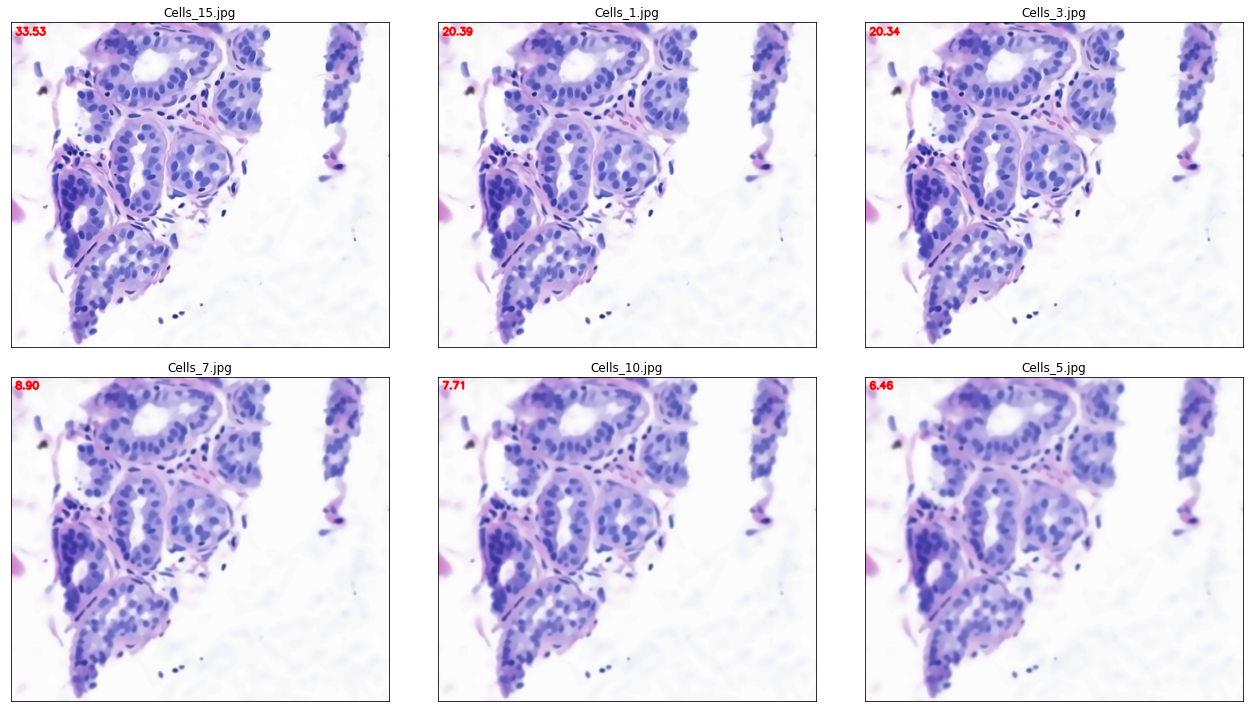

In [8]:
titles = filename
plt.figure(figsize=(18,10))
for i in range(6):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(2,3,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

In [9]:
#Deteksi blur dengan denoising GaussianBlur
warnings.filterwarnings("ignore")
images=[]
value=[]
filename_Original=[]
filename=[]
Original=[]
edited_image=[]
edited_image2=[]



def variance_of_laplacian(image):
	# compute the Laplacian of the image and then return the focus
	# measure, which is simply the variance of the Laplacian
	return cv2.Laplacian(image, cv2.CV_64F),cv2.Laplacian(image, cv2.CV_64F,ksize=7),cv2.Laplacian(image, cv2.CV_64F).var()

def denoise():
  for i in range(len(images)):
    Original[i]=cv2.GaussianBlur(Original[i],(5,5),0)
    images[i]=cv2.GaussianBlur(images[i],(5,5),0)

def preprocessing():
    global images
    global Original
    global filename_Original
    global filename
    global edited_image
    filename_Original=[os.path.basename(x) for x in glob.glob('/content/Project_UAS_VIskom/BreastCancer/*.jpg')]
    filename=[os.path.basename(x) for x in glob.glob('/content/Project_UAS_VIskom/BreastCancer/*.jpg')]
    Original=[cv2.imread(file) for file in glob.glob("/content/Project_UAS_VIskom/BreastCancer/*.jpg")]
    images=[cv2.imread(file) for file in glob.glob("/content/Project_UAS_VIskom/BreastCancer/*.jpg")]

    denoise()

    for i in range(len(images)):
        global result
        gray = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)
        temp,temp2,fm = variance_of_laplacian(gray)
        edited_image.append(temp)
        edited_image2.append(temp2)

        if fm >100:
            text="jelas"

        cv2.putText(images[i], "{:.2f}".format(fm), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3)
        value.append(fm)

def sorting():
    for k in range(len(value)):
        for i in range(len(value)-1):
            if value[i]<value[i+1]:
                temp=images[i]
                images[i]=images[i+1]
                images[i+1]=temp
                temp1=value[i]
                value[i]=value[i+1]
                value[i+1]=temp1
                temp2=filename[i]
                filename[i]=filename[i+1]
                filename[i+1]=temp2
                temp3=edited_image[i]
                edited_image[i]=edited_image[i+1]
                edited_image[i+1]=temp3
def output():
    if os.path.isdir('/content/Project_UAS_VIskom/Output3') is False:
        os.mkdir('/content/Project_UAS_VIskom/Output3')
    for index in range(len(images)):
        nama = f'img_{index+1}_{filename[index]}.jpg'
        img_des = os.path.join('/content/Project_UAS_VIskom/Output3', nama);
        cv2.imwrite(img_des ,images[index]);

def table():
    df=pd.DataFrame({'Nama':filename,'Besar Laplacian':value})
    print(df)

preprocessing()
sorting()
output()
table()

           Nama  Besar Laplacian
0  Cells_15.jpg        23.497497
1   Cells_1.jpg        16.191694
2   Cells_3.jpg        16.145742
3   Cells_7.jpg         5.827874
4  Cells_10.jpg         4.493924
5   Cells_5.jpg         3.030917


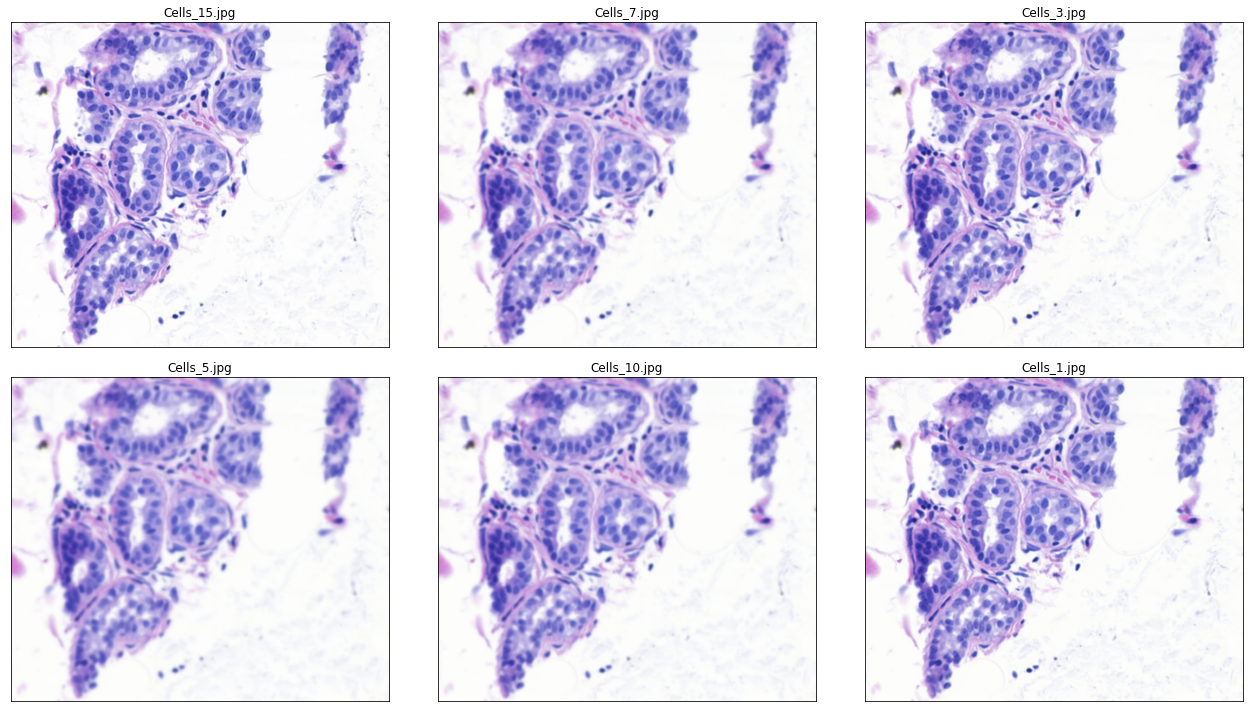

In [10]:

titles = filename_Original
plt.figure(figsize=(18,10))
for i in range(6):
    Original[i] = cv2.cvtColor(Original[i], cv2.COLOR_BGR2RGB)
    plt.subplot(2,3,i+1)
    plt.imshow(Original[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

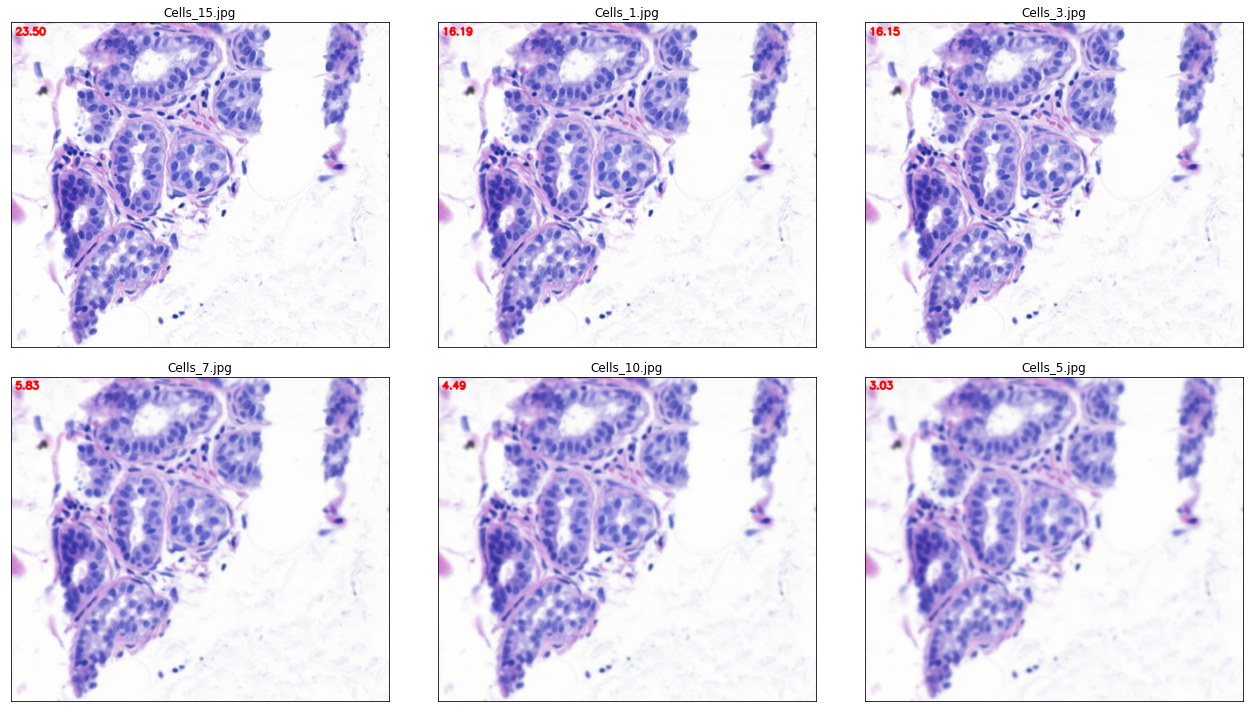

In [11]:
titles = filename
plt.figure(figsize=(18,10))
for i in range(6):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(2,3,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()